# **Walmart Sales Data Analysis**

Walmart is a globally recognized retail giant, renowned for offering a wide range of products at competitive prices, and providing a convenient shopping experience for millions of customers worldwide.

Analyzing this dataset offers valuable insights into Walmart's customer base and purchasing behavior. It reveals details about customer demographics, product preferences, and spending patterns. This comprehensive dataset is a valuable resource for understanding various aspects of Walmart's operations, such as marketing strategies, customer segmentation, and product demand. It can enhance strategic decision-making in areas like inventory management, targeted marketing, and customer relationship management.

### The dataset contains the following columns:

* User_ID: User ID
* Product_ID: Product ID
* Gender: Sex of User
* Age: Age in bins
* Occupation: Occupation(Masked)
* City_Category: Category of the City (A,B,C)
* Stay_In_Current_City_Years: Number of years stay in current city
* Marital_Status: Marital Status
* Product_Category: Product Category (Masked)
* Purchase: Purchase Amount


***
# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings('ignore')

# Load the dataset

In [7]:
df = pd.read_csv('Walmart1.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# Data PreProcessing

In [9]:
# Displaying Top 5 Rows:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
# Displaying bottom 3 Rows:
df.tail(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [11]:
# Basic Information of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [12]:
# Shape of the data :
print(f'Shape of the data :- Rows = {df.shape[0]} & Columns = {df.shape[1]}')

Shape of the data :- Rows = 550068 & Columns = 10


In [13]:
# Check the duplicated data :
df.duplicated().sum()

0

In [14]:
# Check the null values:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

* From the above code we see that there is no duplicate and missing values in the dataset.

In [16]:
# check the datatypes :
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [17]:
# Name of the Columns:
columns = df.columns
columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [18]:
# descriptive statistics values of all the numerical columns :
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [19]:
# Descriptive Statistics velues of all categorical(object) columns :
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


***
# Exploratory Data Analysis (EDA) :

In [21]:
df.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
386226,1005448,P00207942,M,46-50,19,A,4+,0,6,16107


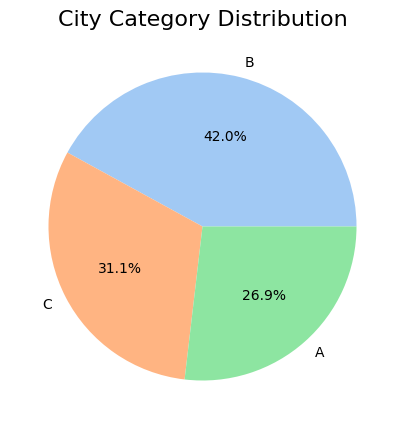

In [22]:
# 1. Pie Chart for City Category Distribution
city_counts = df['City_Category'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('City Category Distribution', fontsize=16)
plt.show()

### [ Observation ] : City B has the highest number of customers, followed by City C and City A.

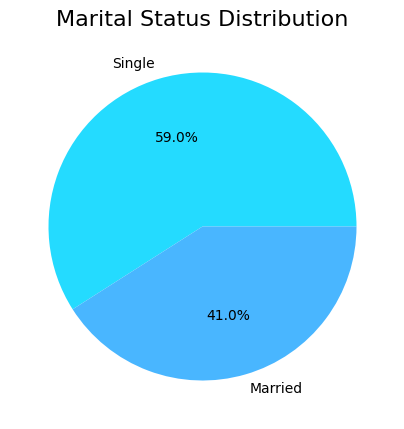

In [24]:
# 2. Pie Chart for Marital Status Distribution
marital_counts = df['Marital_Status'].value_counts()
labels = ['Single', 'Married']
plt.figure(figsize=(5, 5))
plt.pie(marital_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('cool'))
plt.title('Marital Status Distribution', fontsize=16)
plt.show()

### [ Observation ] : The dataset is almost evenly split between single and married customers.

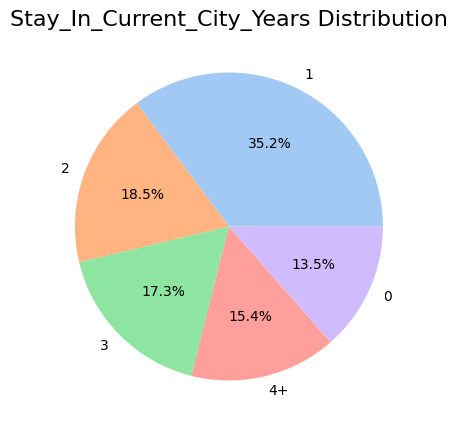

In [26]:
# 3. Pie Chart for Stay in City year Distribution
city_counts = df['Stay_In_Current_City_Years'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Stay_In_Current_City_Years Distribution', fontsize=16)
plt.show()

### [ Observation ] : Most of the customers are stay in city from 1 Years

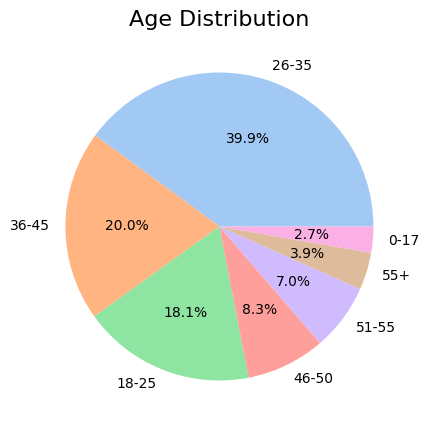

In [28]:
# 4. Pie Chart for Age Distribution
city_counts = df['Age'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Age Distribution', fontsize=16)
plt.show()

### [ Observation ] : Most of the customers are between the 26-35 age group.

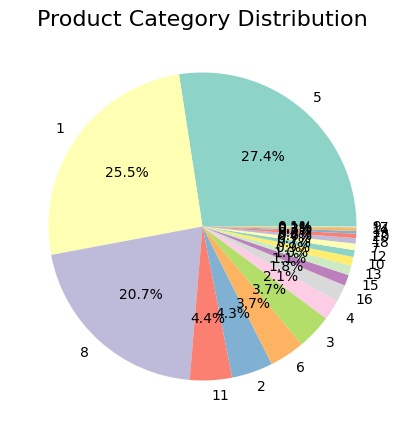

In [30]:
# 5. Pie Chart for Product Category Distribution
product_counts = df['Product_Category'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Product Category Distribution', fontsize=16)
plt.show()

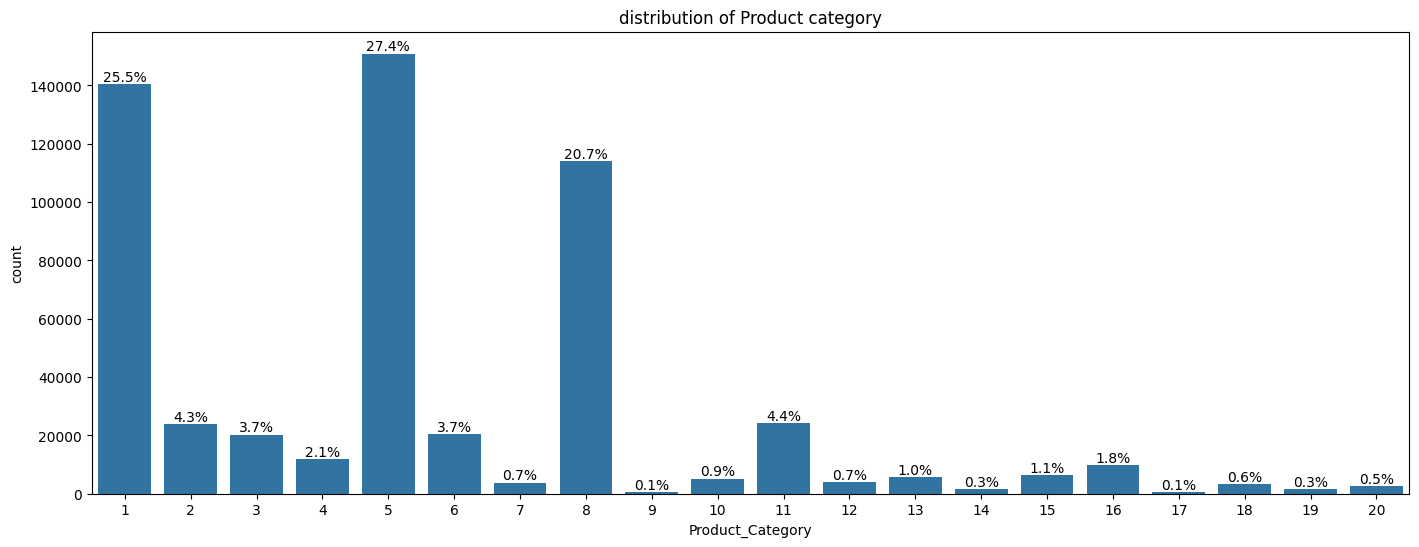

In [31]:
# 6. Visualization of Product Categoray: 

plt.figure(figsize=(17,6))
ax = sns.countplot(data= df, x= 'Product_Category')
# calculate Percentage 
totl_len = len(df['Age'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / totl_len:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='bottom')

plt.title('distribution of Product category')
plt.show()

### [ Observation ] : Certain product categories are purchased more frequently, such as categories 8, 5, and 1.

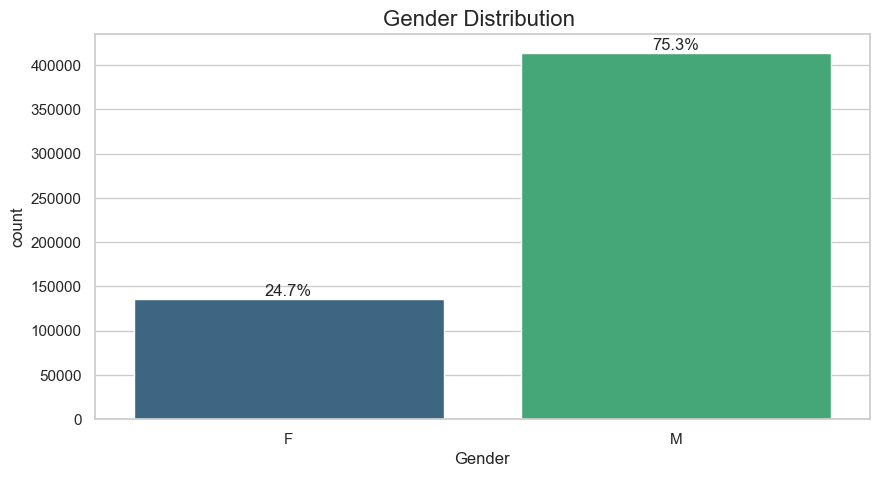

In [33]:
# 7. Visulaization of Gender distribution :

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df, x ='Gender',palette ='viridis' )

# calculate Percentage 
totl_len = len(df['Age'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / totl_len:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='bottom')

plt.title('Gender Distribution ',fontsize=16)
plt.show()

### [ Observation ] : The dataset shows that male customers dominate the commercial store's customer base.

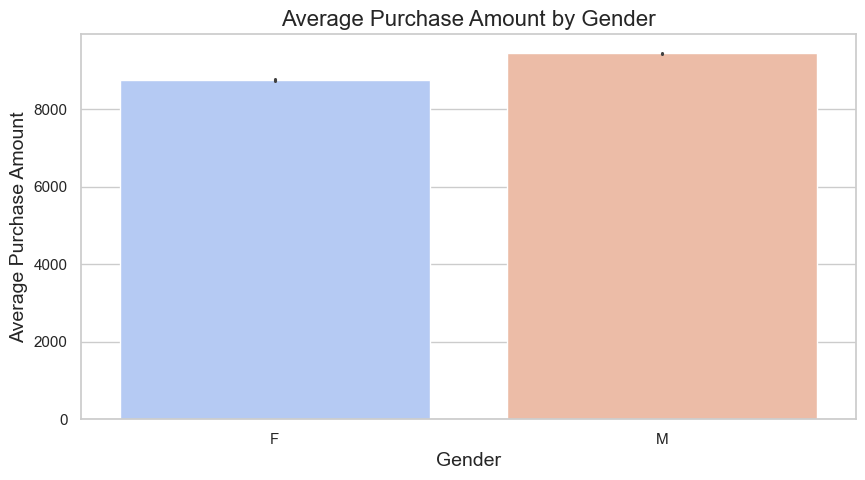

In [35]:
# 8. Gender-wise Purchase Analysis
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Gender', y='Purchase', palette='coolwarm')
plt.title('Average Purchase Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Purchase Amount', fontsize=14)
plt.show()

### [ Observation ] : Males tend to have slightly higher average purchase amounts compared to females.

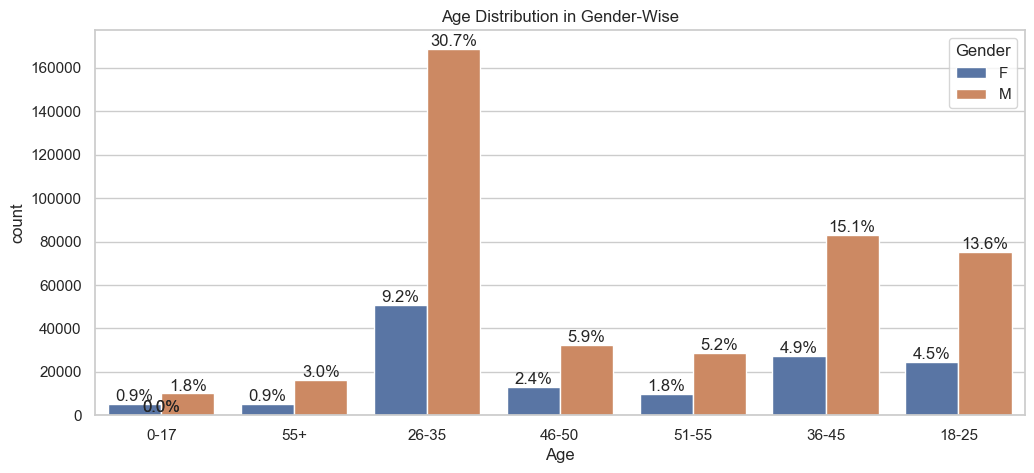

In [37]:
# 9. Percentage of Age distribution in gender wise: 

plt.figure(figsize=(12,5))
ax = sns.countplot(data= df, x= 'Age',hue='Gender',palette='deep')
# calculate Percentage 
totl_len = len(df['Age'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / totl_len:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center', va='bottom')

plt.title('Age Distribution in Gender-Wise')
plt.show()

### [ Observation ] :  The largest segment of customers falls in the 26-35 age group, followed by the 18-25 and 36-45 groups. 

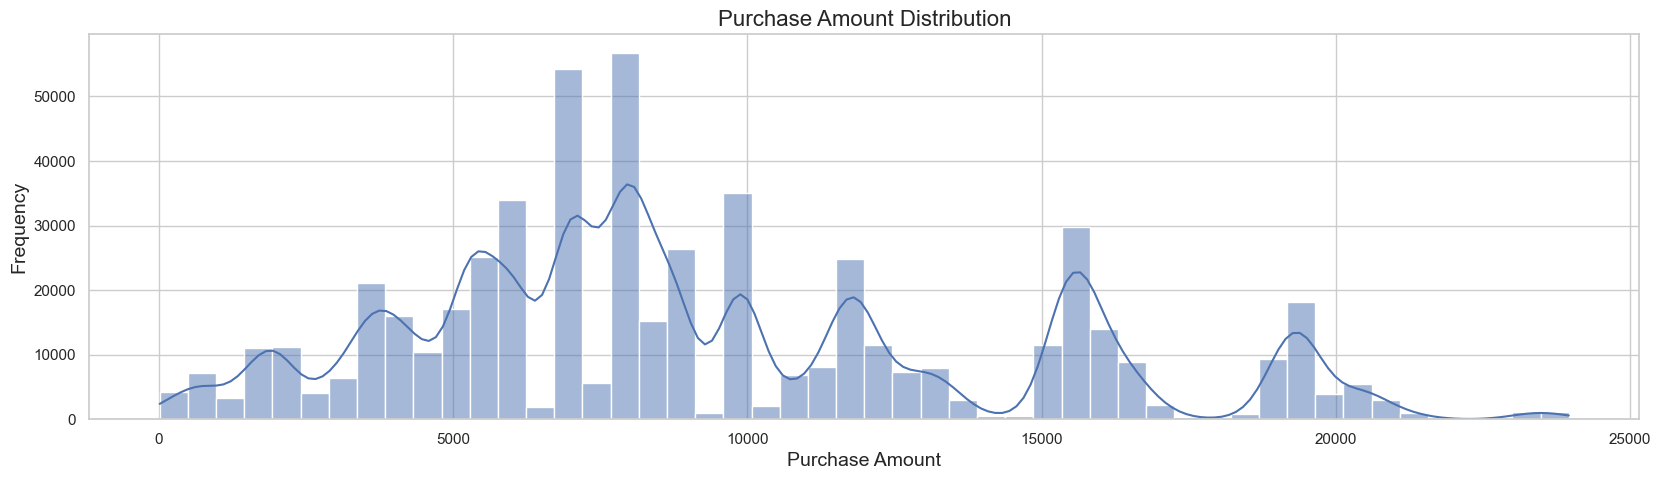

In [39]:
# 10. Purchase Amount Distribution :
plt.figure(figsize=(20, 5))
sns.histplot(df['Purchase'],bins=50, kde=True)
plt.title('Purchase Amount Distribution', fontsize= 16)
plt.xlabel('Purchase Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### [ Observation ] : The purchase amounts are right-skewed, indicating most customers spend lower amounts, but there are a few high spenders (outliers).

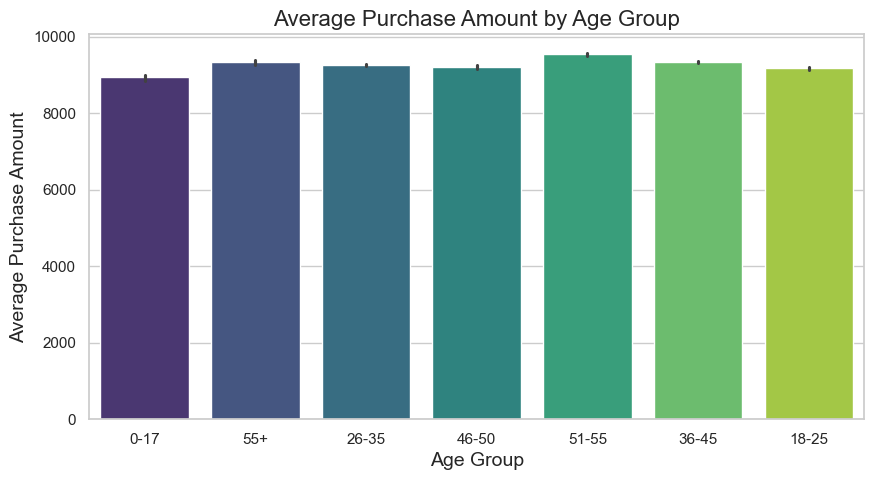

In [41]:
# 11. Age-wise Average Purchase
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Age', y='Purchase', palette='viridis')   
plt.title('Average Purchase Amount by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Purchase Amount', fontsize=14)
plt.show()

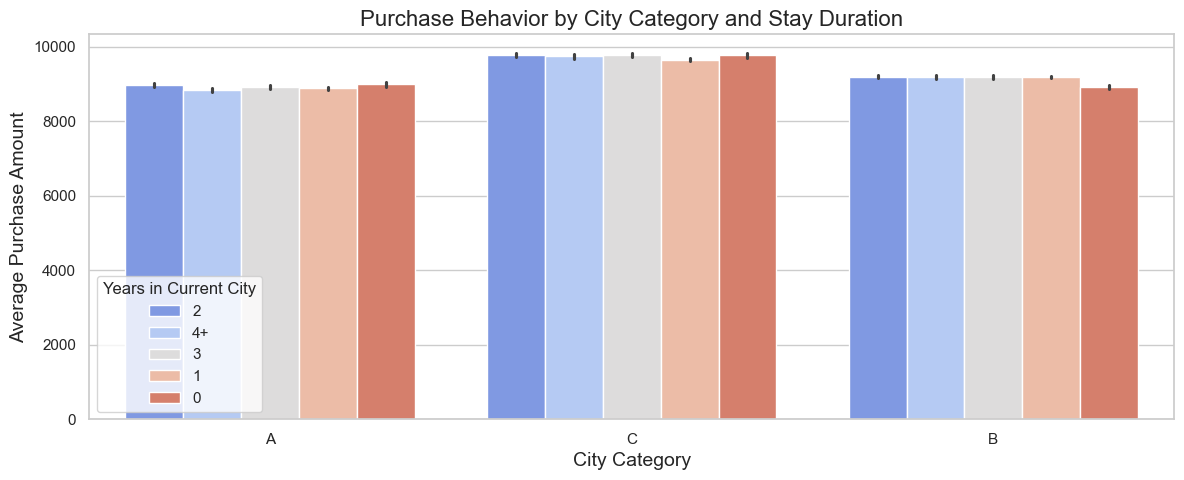

In [42]:
# 12. City Category & Stay Duration Impact on Purchase
plt.figure(figsize=(14, 5))
sns.barplot(data=df, x='City_Category', y='Purchase', hue='Stay_In_Current_City_Years', palette='coolwarm')
plt.title('Purchase Behavior by City Category and Stay Duration', fontsize=16)
plt.xlabel('City Category', fontsize=14)
plt.ylabel('Average Purchase Amount', fontsize=14)
plt.legend(title='Years in Current City')
plt.show()

### [ Observation ] : City C customers have the highest average purchases and Customers who have stayed 2-3 years in their current city tend to spend more.

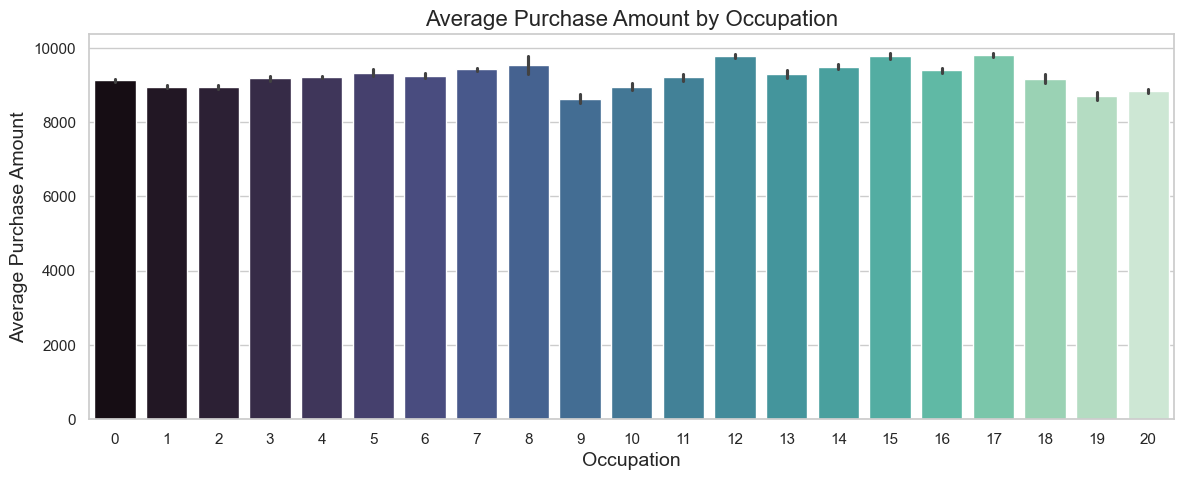

In [44]:
# 13. Average Purchase by Occupation :
plt.figure(figsize=(14, 5))
sns.barplot(data=df, x='Occupation', y='Purchase', palette='mako')
plt.title('Average Purchase Amount by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Average Purchase Amount', fontsize=14)
plt.show()

### [ Observation ] : Certain occupations like 8, 12, 15 and 17 show significantly higher average spending.

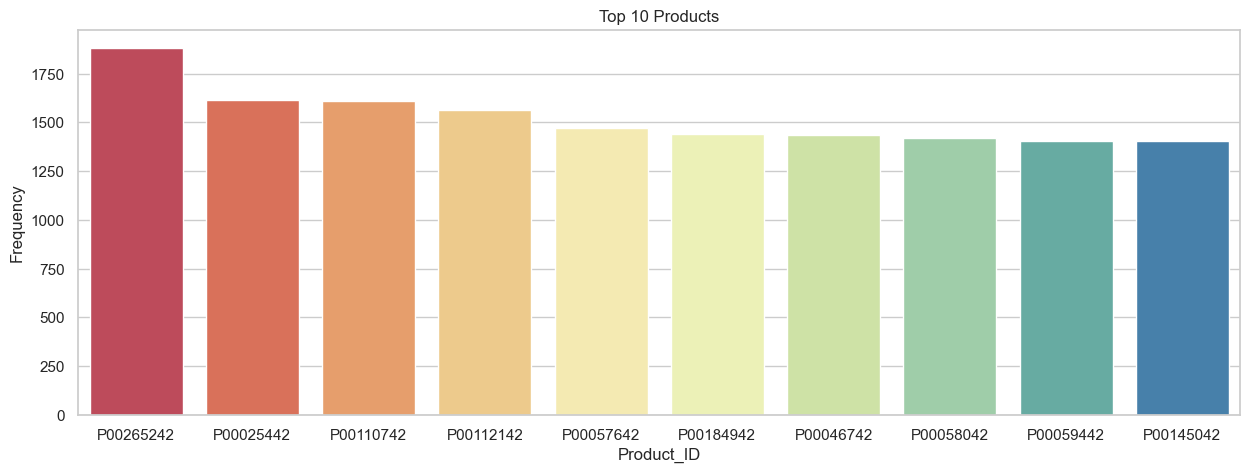

In [46]:
# 14. Top-10 Products with high-Purchase :

top_productID = df['Product_ID'].value_counts().head(10).index
df_top_products = df[df['Product_ID'].isin(top_productID)]

# Plotting with seaborn
plt.figure(figsize=(15, 5))
sns.countplot(x='Product_ID', data=df_top_products, palette='Spectral', order=top_productID)
# Setting title and labels
plt.title('Top 10 Products')
plt.xlabel('Product_ID')
plt.ylabel('Frequency')
plt.show()

### [ Observation ] : Product_ID P00265242 is higher Purchase then other Product_IDs.

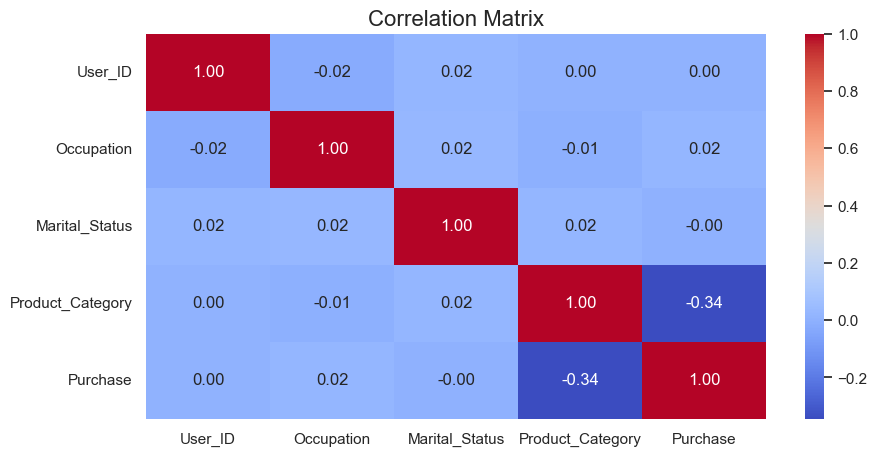

In [48]:
# 15. Correlation Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()


### [ Observation ] : No strong correlations were identified between most variables, but slight links exist between product categories and purchases.

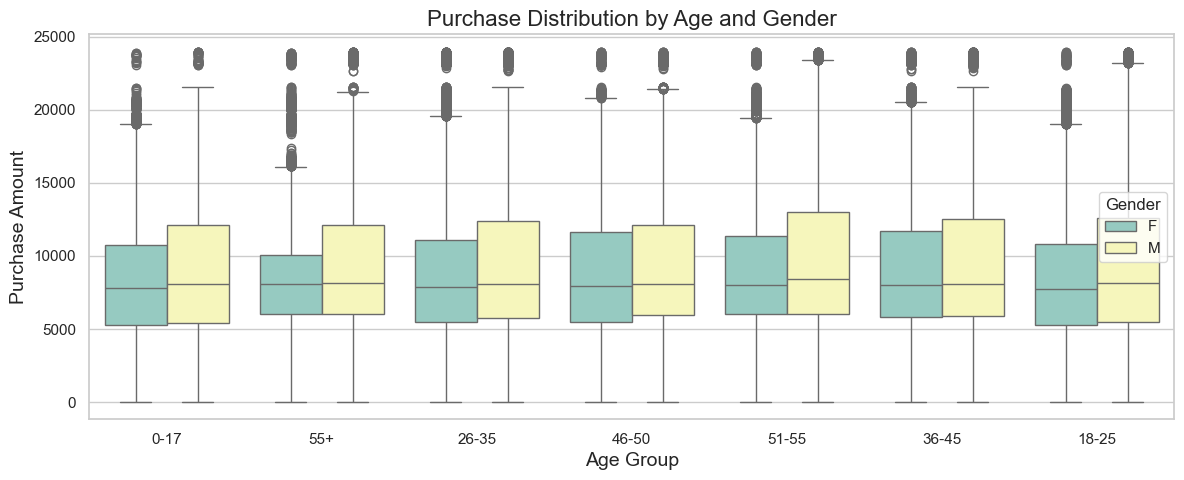

In [50]:
# 16. Boxplot of Purchases by Age and Gender
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Gender', palette='Set3')
plt.title('Purchase Distribution by Age and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)
plt.show()


### [ Observation ] : Males show higher spending variability in middle age groups.

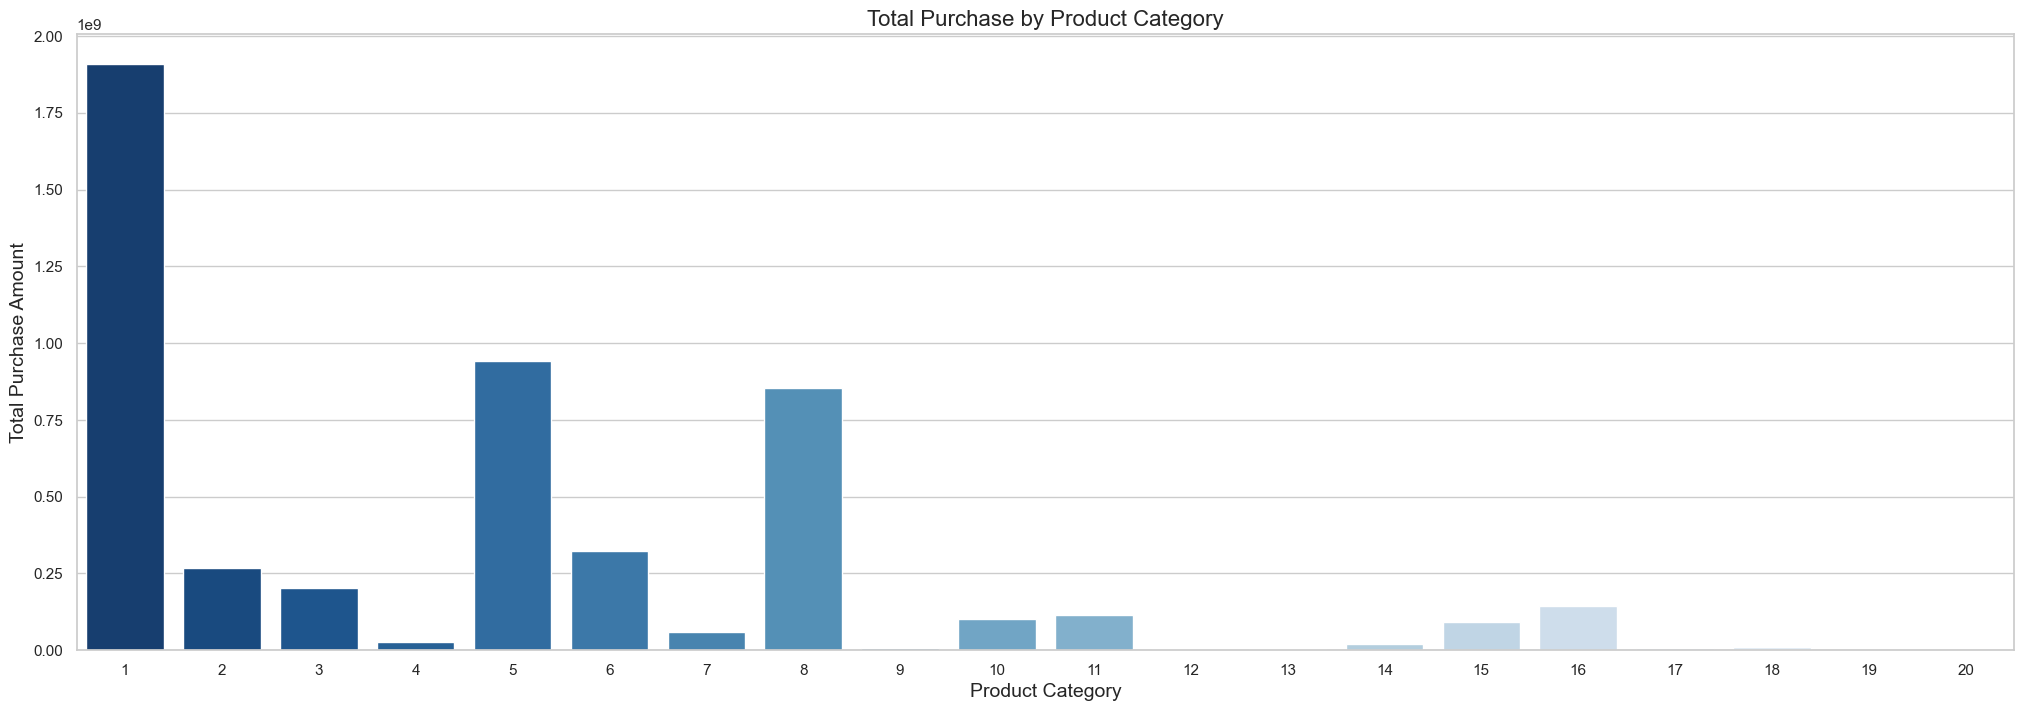

In [52]:
# 17. Groupby: Total Purchase by Product Category
product_purchase = df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(25, 8))
sns.barplot(x=product_purchase.index, y=product_purchase.values, palette='Blues_r')
plt.title('Total Purchase by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)
plt.show()

### [ Observation ] : Product Category 1 generates the highest total purchases, indicating its popularity.

---
### **Conclusion**

1. **Occupational Spending Patterns:** Occupations classified under codes 8, 12, 15, and 17 exhibit notably higher average spending, suggesting targeted marketing strategies could be effective for these groups.

2. **Top Performing Product:** The product with **Product_ID P00265242** recorded the highest purchase frequency, indicating its strong market demand and potential for promotional focus.

3. **Correlation Insights:** While no strong correlations were detected among most variables, there are minor associations between product categories and purchasing behaviors, warranting further investigation.

4. **Gender-Based Spending Variability:** Male consumers display greater variability in spending, particularly within the middle-age demographic, highlighting an opportunity for tailored marketing interventions.

5. **Product Category Performance:** **Product Category 1** emerged as the top-performing segment in terms of total purchases, underscoring its popularity and potential for driving future sales growth.

---
